In [5]:
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pylab as pl
from scipy.signal import butter, freqz, filtfilt, firwin, iirnotch, lfilter, find_peaks

In [6]:
def pull_data(dir_name, file_name):
    f = open(dir_name + '/' + file_name + '.csv')
    xs = []
    ys = []
    zs = []
    rs = []
    timestamps = []
    for line in f:
        value = line.split(',')
        if len(value) > 3:
            timestamps.append(float(value[-4]))
            x = float(value[-3])
            y = float(value[-2])
            z = float(value[-1])
            r = math.sqrt(x ** 2 + y ** 2 + z ** 2)
            xs.append(x)
            ys.append(y)
            zs.append(z)
            rs.append(r)
    return np.array(xs), np.array(ys), np.array(zs), np.array(rs), np.array(timestamps)


In [7]:
# read accelerometer data file

accel_file = 'data'
x_data, y_data, z_data, signal, timestamps = pull_data(accel_file, 'fall2')

c = timestamps[0]
timestamps = (timestamps - c)/1000000000

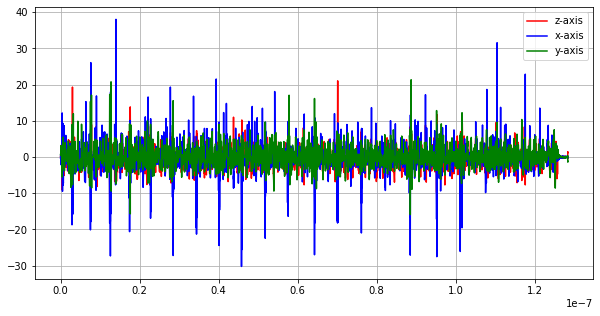

In [34]:
# here we are plotting the z,y&z from the accel data
plt.figure(figsize=(10,5))
pl.plot(timestamps, z_data, 'red', label = 'z-axis')
pl.plot(timestamps, x_data, 'blue', label = 'x-axis')
pl.plot(timestamps, y_data, 'green', label = 'y-axis')

plt.legend(loc='upper right')
pl.grid()
pl.show()

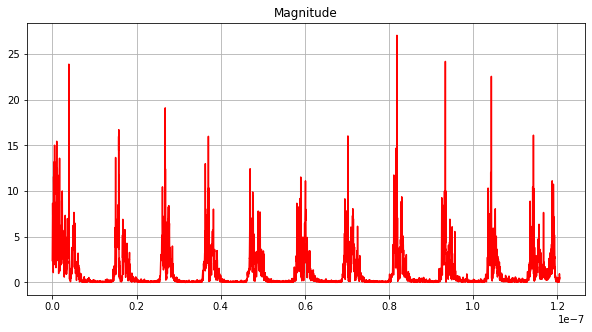

In [8]:
#here we are caclulating & plotting the magnitude
magnitude = np.sqrt(x_data**2 + y_data**2 + z_data**2)
plt.figure(figsize=(10,5))
pl.plot(timestamps, magnitude, 'r-',label='magnitude')
plt.title("Magnitude")
pl.grid()
pl.show()

In [9]:
#here we are creating and appluing the bw filter 

cutoff = 1
fs = 50.0  
order = 5
nyq = 0.5 * fs
normal_cutoff = cutoff / nyq
b, a = butter(order, normal_cutoff, btype='low', analog=False)
BWfiltered = filtfilt(b, a, signal)

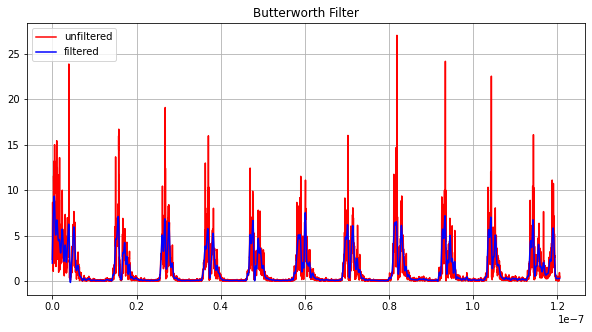

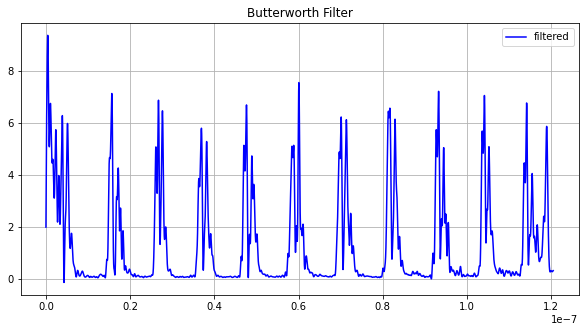

In [10]:

#here we are plotting the singlas before and after the bw filter

plt.figure(figsize=(10,5))
pl.plot(timestamps, signal, 'r-',label='unfiltered')
pl.plot(timestamps, BWfiltered, 'b-', label='filtered')
plt.title("Butterworth Filter")
plt.legend(loc='upper left')
pl.grid()
pl.show()


plt.figure(figsize=(10,5))
pl.plot(timestamps, BWfiltered, 'b-', label='filtered')
plt.title("Butterworth Filter")
plt.legend(loc='upper right')
pl.grid()
pl.show()

In [19]:
# this is our fall detection algo
falls,_ = find_peaks(BWfiltered, height=6) 
print(falls)
print(f"{len(timestamps[falls])} falls detected")

[   43   107   389  1565  2672  2766  4762  6007  7009  7134  8132  8167
  8289  9324 10412 11414]
16 falls detected


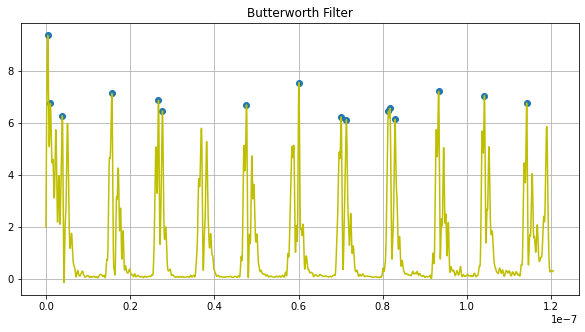

In [18]:
# plotting where our algo detects steps
plt.figure(figsize=(10,5))
pl.plot(timestamps[falls], BWfiltered[falls], 'o')
pl.plot(timestamps, BWfiltered, 'y-', label='filtered')
plt.title("Butterworth Filter")
pl.grid()
pl.show()